# Project: Investigating a No Show Appointment Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Despite new technologies being invented to make sure everyone has easy accesss to healthcare facilities, a number of hospitals still have patients not showing up for their scheduled appointments. This causes hopitals to incurr loses in running their facilities since they thrive on patients showing up.

This analysis will provide more insights in+to why patients do not show up for their appointments and provide posssible solutions to improving show ups.

The dataset used for this analysis was collected from hospitals in Brazil. This data contains 100,000 medical appointments from Brazil and is focused on whether or not patients showed up for their appointment.

This dataset contains 14 unique variables(Patientid, Appointmentid, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhod, Scholarship,Hipertension, Diabetes, Alcoholism, Handicap, SMS_received and No_show)
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
'No_show' last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
### The first step to the data analysis process is to ask questions. In this section,the questions asked will help focus on relevant part of the data and direct our analysis towards meaninful insights.

Our dependent variable in this data set  is the No_Show variable. Any other variable is independent on No_show.

Some questions that will drive us into meaningful insights of this datasets are:

    1.Does the patient's age play a role in him/her showing up?
    2.Does the patient's gender play a role in a patient showing up?
    3.What is the time frame between the scheduledDay and the appointmentDay? Does it impact the patients ability to show                up?
    4.Is there a possibility that patients enrolled in the Brasilian welfare program Bolsa Familia showed up more?
    5.Is an SMS reminder the reason why some patients show up and others do not?
    6.Is proximity to the hospital a factor for no show?

In [264]:
#Importing Data Analysis Packages
import pandas as pd
import numpy as np

#Data Visualisation Packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



<a id='wrangling'></a>
## Data Wrangling
The next step in the data analysis process is to wrangle our data. This is where we gather, assess and clean our data. Our dataset will be uploaded, checked for cleanliness, and then trimed and cleaned for analysis

In [285]:
# Loading data 
df = pd.read_csv('No_Show.csv')

#printing out a few lines.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Dimensions of the dataframe
df.shape #The dataframe has 11,0527 rows and 14 columns

(110527, 14)

In [20]:
# Inspecting the datatypes of columns by using the function info
# Some columns have the wrong spelling and  i. e. Hipersion and  Handcap.
# It is also ideal we change all column headings to small letters for consistency
# We observe that we have no non-nul values in our dataset, i.e all our columns have entries.D 
#AppointmentId and AppointmentID are not in their right format
# Also, Timestamps for ScheduledDay and AppointmentDay are represented as strings instead of datetimes
# As we go futher to data cleaning,these columns will be changed to datetimes for more accurate computations.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [23]:
# This returns the sum of the number of unique values 

df.nunique().sum() # We have 276,051 unique values 

276051

In [24]:
#This returns useful descriptive statistics of each column 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


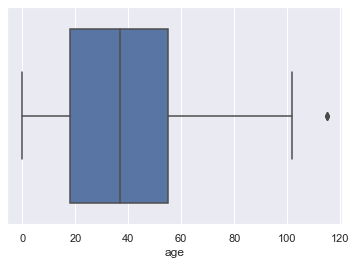

In [137]:
# The Age variables has a minimium value of -1 which is an annormally.
# The boxplot below reveals this anonormally

sns.boxplot(x='age',data = df);

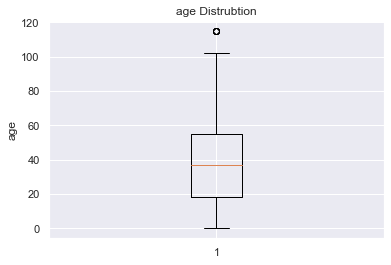

In [138]:
#from the below boxplot, we can see that -1 is an unrealistic age which can affcet our data analysis so its needs be dropped
# but 115 is the oldest aga and can be considered

fig, ax = plt.subplots()
bp = ax.boxplot(df["age"])
ax.set_title('age Distrubtion')
ax.set_ylabel('age')
plt.show()

In [140]:
# To drop the outliner,

def outlier(df,age):
    q1 = df['age'].quantile(0.25)
    q3 = df['age'].quantile(0.75)
    IQR = q3-q1
    df = df.loc[~((df['age'] < (q1 -1.5 * IQR))| (df['age'] < (q3 +1.5 * IQR))),]
    return df
outlier(df,'age')
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [143]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


### Data Cleaning
After discussing the structure of the data and the problems that need to be addressed, it is now time to perfrom those cleaning steps on our dataset.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [26]:
# To check for duplicates in our data

sum(df.duplicated())                #we have zero duplicates in our data

0

In [ ]:
# dropping the columns of patient ID and appointmentID since they are unique to each patient and will not be relevant
# in our analysis

df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [130]:
# Renaming the data sets with small caps and right formatting

df=df.rename(columns={"Gender":"gender","ScheduledDay":"scheduled_day","AppointmentDay":"appointment_day",
                      "Age":"age","Neighbourhood":"neighbourhood","Scholarship":"scholarship","Hipertension":"hypertension",
                      "Diabetes":"diabetes","Alcoholism":"alcoholism","Handcap":"handicap","SMS_received":"sms_received",
                      "No-show":"no_show"})

df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1


Reference: https://re-thought.com/guide-to-renaming-columns-with-python-pandas/#:~:text=If%20you%20need%20to%20rename%20a%20specific%20column,using%20rename%20method%3A%20df.rename%20%28columns%3D%20%7B%27old_column_name%27%3A%20%27new_column_name%27%7D%2C%20inplace%3DTrue%29

In [40]:
#  Changing the datatypes of patient_id and appointment_id

to_str = ['patient_id','appointment_id']
for string in to_str:
    df[string] = df[string].astype('str')

In [41]:
# Changing the datatypes of scheduled_day and appointment_day to datetimes

to_date =['appointment_day','scheduled_day']
for data in to_date:
    df[data] = df[data].apply(pd.to_datetime).dt.date
    df[data] = df[data].apply(pd.to_datetime)

In [ ]:
# dropping the columns of patient ID and appointmentID since they are unique to each patient and will not be relevant
# in our analysis

df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

In [131]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1


In [107]:
# Changing the No-show value to 0 and 1 for better analysis

df.replace(to_replace=['No', 'Yes'], value=[1, 0],inplace=True)
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

in this section, the dataset will be ecplored and augmented to maximise the potential of our analysis and visualizations. Exploring involves finding patterns and visualizing relationships between variables. Also, outliners will be removed if there to create better features.

Now, lets look at the correlation matrix to show the relationship the No-show and all other variables

In [108]:
df.corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
no_show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


From the above, it looks like all relation positive/negative are very small, but there is a Negative correlation between no_show and scholarship and SMS received.

Now, looking at our questions individually 

### Research Question 1 Does the patient's age play a role in him/her showing up?

In [120]:
present = df['no_show'] == 1
absent = df['no_show'] == 0

In [129]:
print(df['age'][present].mean())
print(df['age'][absent].mean())

37.790504154999034
34.31766656212196


In [134]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [144]:
def plot_style(x2,y2,title):
    ax.set_xlabel(x2)
    ax.set_ylabel(y2)
    ax.set_title(title)
    plt.legend();

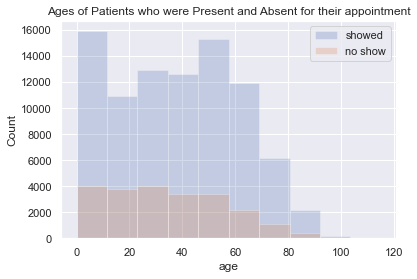

In [147]:
ax = df['age'][attend].hist(alpha = 0.25, label='showed')
ax = df['age'][absent].hist(alpha = 0.25, label='no show')
plot_style(x2 = "age",y2="Count",title="Ages of Patients who were Present and Absent for their appointment")

From the diagram above, a lot of patients showed up for their appoinment despite their age. That is age did not really affect a patients ability to show up.

In [149]:
# Putting the ages into groups to determine the specific groups that showed up more

df['age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [152]:
# Grouping the ages 

age_group= [0,15,30,45,60,75,90,105,120]
df['age_group'] = pd.cut(df['age'],bins = age_group)
age_group_count = df.groupby('age_group')['no_show'].value_counts()

In [154]:
df['age_group'].value_counts().sort_values(ascending = True)

(105, 120]        5
(90, 105]       303
(75, 90]       5084
(60, 75]      14370
(0, 15]       20929
(15, 30]      21163
(30, 45]      21954
(45, 60]      23179
Name: age_group, dtype: int64

In [163]:
#counting the number of absent and present for the age groups

age_group_count

age_group   no_show
(0, 15]     1          16320
            0           4609
(15, 30]    1          15921
            0           5242
(30, 45]    1          17262
            0           4692
(45, 60]    1          19048
            0           4131
(60, 75]    1          12234
            0           2136
(75, 90]    1           4276
            0            808
(90, 105]   1            244
            0             59
(105, 120]  0              3
            1              2
Name: no_show, dtype: int64

In [164]:
# Calculating the percentages of the age groups

(df['age_group'].value_counts().sort_values(ascending = True))/len(df)*100

(105, 120]     0.004524
(90, 105]      0.274144
(75, 90]       4.599823
(60, 75]      13.001466
(0, 15]       18.935816
(15, 30]      19.147531
(30, 45]      19.863200
(45, 60]      20.971536
Name: age_group, dtype: float64

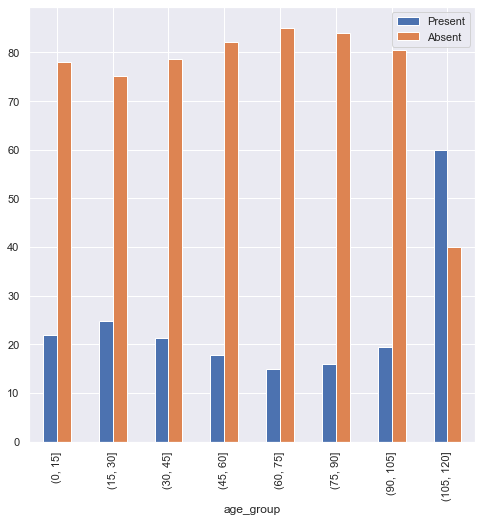

In [237]:
(age_group_count/age_group_count.groupby(level = 0).sum()*100).unstack().plot(kind = 'bar', figsize = (8,8))
plt.legend(['Present','Absent']);

The population of patients between 30 and 60 years make 41% of the total age group while people above 90 make less than 1% of the population.
Comparing age group with ability to show up, its noticed that people between the ages of 30 to 60 show up more for their appointment as well as people above 100, this could be because they are more health conscious and are constantly engaged in physical activities. There is no clear correlation between patient age and their ability to show up.

### Research Question 2  Does the patient's gender play a role in a patient showing up?

In [286]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

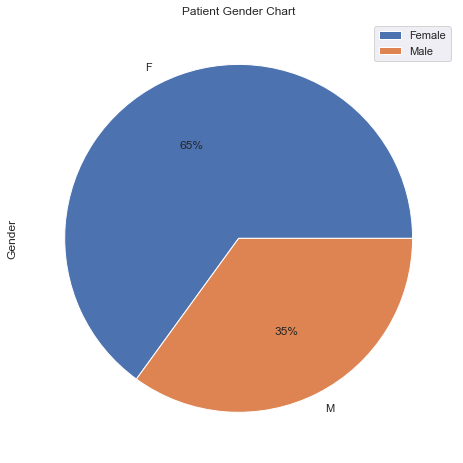

In [295]:
gender_percent = round(df['Gender'].value_counts()/len(df)*100)
gender_percent.plot(kind = 'pie',figsize = (12,8),autopct = '%1.0f%%') 
plt.legend(['Female','Male'])
plt.title('Patient Gender Chart');

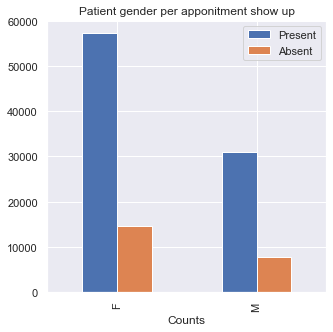

In [303]:
df1 = df.groupby('Gender')['No-show'].value_counts().unstack()
df1.plot(kind = 'bar',figsize= (5,5))
plt.xlabel('Counts')
plt.title('Patient gender per apponitment show up')
plt.legend(['Present','Absent']);

In [299]:
round((df.groupby('Gender')['No-show'].value_counts())/len(df)*100)

Gender  No-show
F       No         52.0
        Yes        13.0
M       No         28.0
        Yes         7.0
Name: No-show, dtype: float64

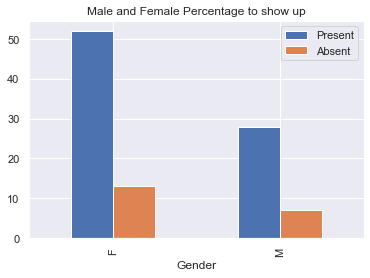

In [301]:
round((df.groupby('Gender')['No-show'].value_counts().unstack())/len(df)*100).plot(kind = 'bar')
plt.legend(['Present','Absent'])
plt.title('Male and Female Percentage to Show Up');

    Females make 65% of the total population and are more likely to show up for appointments compared to                              their males. This can be due to the fact that probably some females were pregnant and had to make                                    it to thier antenatal appointment also most females tend to be health concious than males.
    The data shows that there is direct correlation between patients gender and their ability to                                   show us as 52% of the largest gender population shows up for appointment.

### Research Question 3.What is the time frame between the scheduledDay and the appointmentDay? Does it impact the patients ability to show  up?

In [310]:
# Changing the datatypes of scheduled_day and appointment_day to datetimes

to_date =['AppointmentDay','ScheduledDay']
for data in to_date:
    df[data] = df[data].apply(pd.to_datetime).dt.date
    df[data] = df[data].apply(pd.to_datetime)

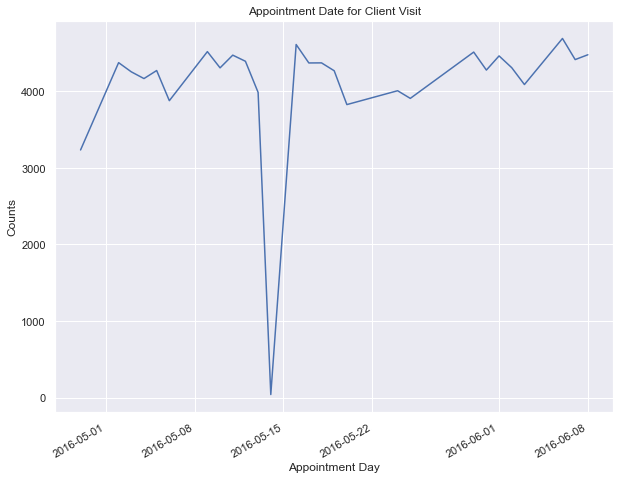

In [313]:
#Plotting the graph for AppointmentDay

df['AppointmentDay'].value_counts().plot(figsize = (10,8))
plt.xlabel('Appointment Day')
plt.ylabel('Counts')
plt.title('Appointment Date');

In [314]:
df1 = df.groupby('AppointmentDay')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = True)
df1.head()

No-show,No,Yes
AppointmentDay,,
2016-05-14,30,9
2016-04-29,2602,633
2016-05-20,2929,899
2016-05-13,3082,905
2016-05-06,3084,795


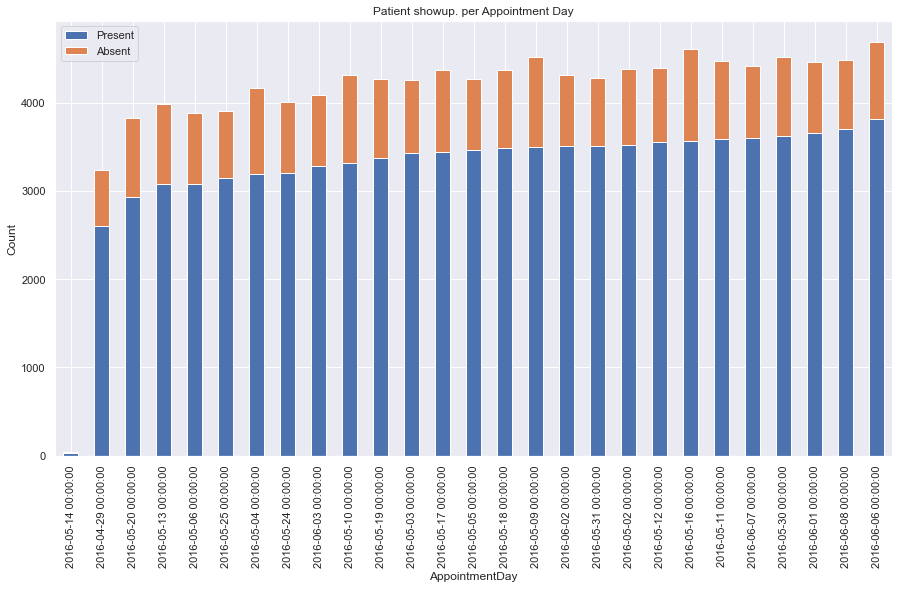

In [320]:
df1.plot(kind = 'bar',  stacked = True, figsize = (15,8))
plt.title('Patient showup. per Appointment Day')
plt.legend(['Present','Absent'])
plt.ylabel('Count');

In [321]:
df['ScheduledDay'].value_counts()

2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64

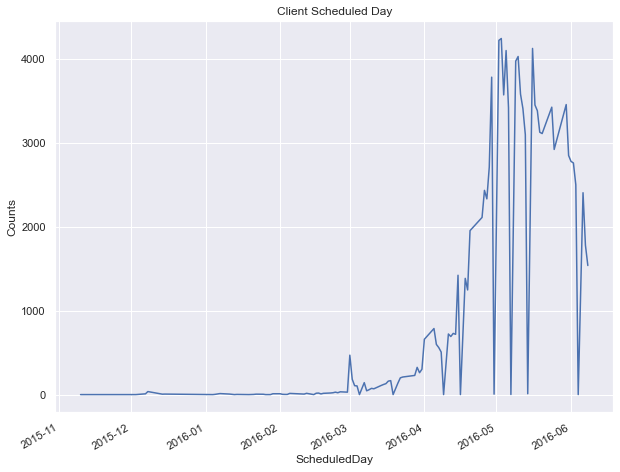

In [322]:
df['ScheduledDay'].value_counts().plot(figsize = (10,8))
plt.xlabel('ScheduledDay')
plt.ylabel('Counts')
plt.title('Client Scheduled Day');

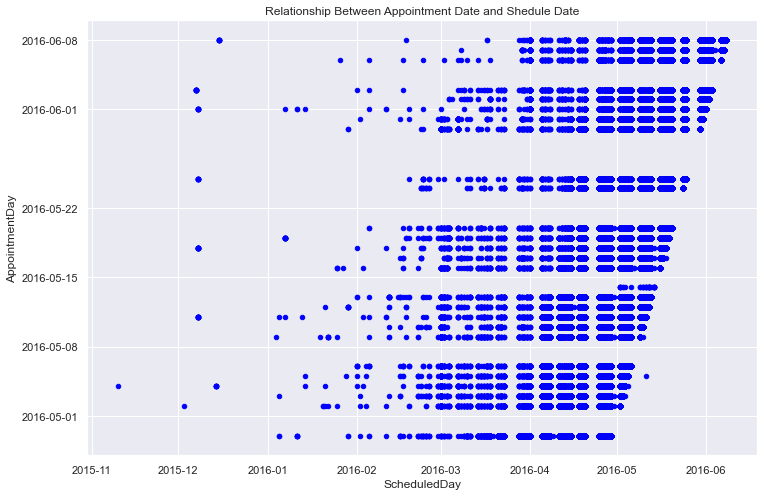

In [325]:
#Relationship between Appointment Date and Schedule Date

df.plot(kind = 'scatter', x = 'ScheduledDay', y ='AppointmentDay',figsize = (12,8), color="blue")

plt.title('Relationship Between Appointment Date and Schedule Date');

In [326]:
df['Time_Diff'] = df['AppointmentDay']- df['ScheduledDay']
df['Time_Diff'].value_counts().sort_values(ascending = False)

0 days      38563
2 days       6725
4 days       5290
1 days       5213
7 days       4906
            ...  
82 days         1
127 days        1
126 days        1
151 days        1
123 days        1
Name: Time_Diff, Length: 131, dtype: int64

In [327]:
df1 = df.groupby('Time_Diff')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = False)
df1

No-show,No,Yes
Time_Diff,,
0 days,36771.0,1792.0
2 days,5123.0,1602.0
1 days,4100.0,1113.0
4 days,4059.0,1231.0
7 days,3597.0,1309.0
...,...,...
126 days,NaN,1.0
132 days,NaN,1.0
139 days,NaN,1.0


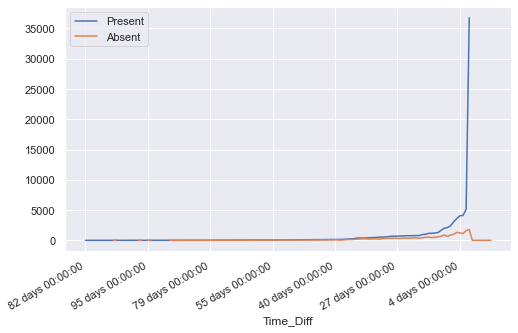

In [330]:
df1 = df.groupby('Time_Diff')['No-show'].value_counts().unstack().sort_values(by = 'No',ascending = True)
df1.plot(figsize = (8,5))
plt.legend(['Present','Absent']);

From the above analysis, waiting time plays a difference in clients showing up for their appointment.Analyzing the difference between schedule and appointment shows that 25 percentile had sameday call up while some patient had to wait as long as 179days after scheduling an appointment. 

<a id='conclusions'></a>
## Conclusions
        1. Comparing age group with ability to show up, its noticed that people between the ages of 30 to 60 show up more            for their appointment as well as people above 100, this could be because they are more health conscious and are constantly engaged in physical activities. There is no clear correlation between patient age and their ability to show up.
       2. Females make 65% of the total population and are more likely to show up for appointments compared to                        their males. This can be due to the fact that probably some females were pregnant and had to make it to thier antenatal appointment also most females tend to be health conscious than males.
        3.From the above analysis, waiting time plays a difference in clients showing up for their appointment.Analyzing the difference between schedule and appointment shows that 25 percentile had sameday call up while some patient had to wait as long as 179days after scheduling an appointment. 
    
## Limitations
    1.The data set was was not varse, as the data was collectd within a small time frame. Therefore not enough correlation between no show and the other variables.
    2.The data set is not recent, therefore cannot be applied in recent times.An update of the data could have helped in drawing more solid conclusions on relationships between variables.
    3.https://en.wikipedia.org/wiki/2016_in_Brazil#May. Researching into the dates shows that, missed appointments were on days when there were quite a number of political activities in Brazil Like the impeachment from the president of Brazil which could have had an impact on no shows.
 